## TASK 3 - Scene recognition with Bag of Visual Words

Group Number: Group_9-11_11


### 1 Data import and Preparation

Complete the class ***SceneDataset*** in ***dataset.py*** and load the training and test dataset. (images and class labels)

In [22]:
%load_ext autoreload
%autoreload 1
%aimport features, dataset, utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
import features
import dataset
import utils
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

#student_code start
train_data = None
test_data = None
class_names = None

train_data = dataset.SceneDataset('data/scene/train')
test_data = dataset.SceneDataset('data/scene/test')
class_names = train_data.class_names

#test_images = test_data.images
#train_images = train_data.images

#student_code end
print('Imported test data: ',len(test_data.images))
print('Imported training data: ', len(train_data.images))
print(class_names)


Imported test data:  400
Imported training data:  1600
['bedroom', 'coast', 'forest', 'kitchen', 'livingroom', 'mountain', 'office', 'store', 'street', 'tallbuilding']


###  2 Build Vocabulary and Clusters

Extract SIFT features from the training data using ***features.extract_dsift(..)*** and then utilize the descriptors to generate visual words with ***KMeans(...).fit(...).cluster_centers_*** from ***sklearn.neighbors***. Set the sample size per image at about **100** and a step size around **5**. For cluster size, try a value around **50**. You can adapt the paramater to achieve better results. If clustering takes too long, have a look at the parameters **n_init** and **max_iter** of ***KMeans(...)***.

_***HINT:***_
***KMeans(..)*** expects the features to be a stacked 2D matrix instead of a list (np.vstack(...)).


In [20]:
#student code start
train_data.images
dsift = features.extract_dsift(images = train_data.images,stepsize=5,num_samples=100)
clusters = KMeans(n_clusters=50).fit(np.vstack(dsift)).cluster_centers_
# ~2m 25s
#student code end

  0%|          | 0/1600 [00:00<?, ?it/s]

DSIFT Extraction: {3.636103111999546}  seconds


###  3 Classification

Generat a histogram per image using the centroids. First extract the dense SIFT features of the training set again. This time use a smaller stepsize (eg. 1 or 2) and take all samples.

After, implement ***count_visual_words(..)*** in ***features.py*** to obtain a histogram per image. Build a kNN classifier with ***KNeighborsClassifier(..)*** and fit the the model with the histogram data of the training images and training labels. Set the neighbourhood size to **3**.


In [12]:
#student code start
# https://datascience.stackexchange.com/questions/16143/what-is-the-procedure-to-create-a-bag-of-visual-words-model-with-sift

dense_desc = features.extract_dsift(images = train_data.images,stepsize=2,num_samples=None)
hist, bin_edges = features.count_visual_words(dense_feat=dense_desc,centroids=clusters)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X=hist,y=train_data.labels)
#~10m
#student code end

  0%|          | 0/1600 [00:00<?, ?it/s]

DSIFT Extraction: {13.9761507660005}  seconds


  0%|          | 0/1600 [00:00<?, ?it/s]

Counting visual words: {641.3890722020005}  seconds


KNeighborsClassifier(n_neighbors=3)

### 4 Evaluation

Examine the accuracy of your model by extracting the dense SIFT points of the test set with the same stepsize as before, generate the histogams and predict the labels of the test set with the previously fitted classifier. Plot your results with ***utils.plot_confusion_matrix(..)***.

_***HINT:***_
Use the methods ***predict(..)*** and ***score(..)*** on the KNN classifier.


***Submission:*** Save the confusion matrix with the KNN score as **task3_accuracy_test_data.png** using ***utils.plot_confusion_matrix(..)***.



In [13]:
#student code start
dense_desc_test = features.extract_dsift(images = test_data.images,stepsize=2,num_samples=None)
hist_test, bin_edges_test = features.count_visual_words(dense_feat=dense_desc_test,centroids=clusters)
predicts = knn.predict(hist_test)
score = knn.score(hist_test,test_data.labels)
print(f"score = {score}")
#student code end

  0%|          | 0/400 [00:00<?, ?it/s]

DSIFT Extraction: {3.6151211650012556}  seconds


  0%|          | 0/400 [00:00<?, ?it/s]

Counting visual words: {154.98841299999913}  seconds
score = 0.45


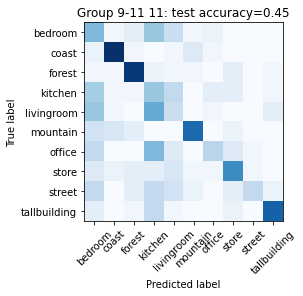

In [14]:
utils.plot_confusion_matrix(test_data.labels, predicts, score, class_names, 
                          group_no = 'Group 9-11 11', name = "task3_accuracy_test_data.png")

***
#### Q1: Analyze the confusion matrix. Are there classes which can be more easily identified than others. What could be the reason? What classes perform worst, and explain your answer.


The scenes that achive the best result are coast, forest, mountain, tallbuilding and store. Scenes that result in a lower score are bedroom, kitchen, livingroom, office, street. 

While most of the detected scenes are outdoor scenes that often greatly visually differ from each other, e.g. coast vs forest. Indoor scenes seems to get a lower scores probnably because the are visually more identical and therefore harder to detect with handcrafted features like in our bag of words approach. 

One example of a bad score is office. When we look at the training dataset we see that some images show a cluttered bookshelf and desk while others show a more organized desk. On the other had the good detected forest shows on all images different trees with leaves. Therefore we assume some classes have an easier pattern to detect than others


Take some own test images and investigate if they can be correctly classified with you trained model. For instance, take a photo of your own kitchen or living room and classify it. You should at least test one photo from three of the ten categories. Make sure the images are resized and cropped to 100x100.


***Submission:*** Save the confusion matrix with the model score as **task3_accuracy_custom_data.png** using ***utils.plot_confusion_matrix(..)***.


train data classnames ['bedroom', 'coast', 'forest', 'kitchen', 'livingroom', 'mountain', 'office', 'store', 'street', 'tallbuilding']
own data classnames ['bedroom', 'coast', 'forest', 'kitchen', 'livingroom', 'mountain', 'office', 'store', 'street', 'tallbuilding']


  0%|          | 0/20 [00:00<?, ?it/s]

DSIFT Extraction: {0.1709490060002281}  seconds


  0%|          | 0/20 [00:00<?, ?it/s]

Counting visual words: {7.819358125998406}  seconds
score = 0.15


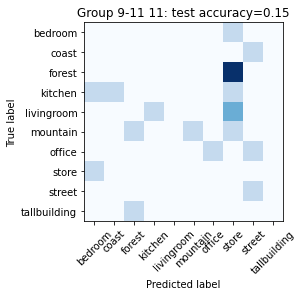

[7 8 7 7 7 7 1 0 7 7 3 7 5 2 7 8 6 0 8 2]


In [21]:
#student code start
# I added an img for each category otherwise the class labels would be wrong 
test_data_own = dataset.SceneDataset('data/own', resize=True)
class_names_own = test_data_own.class_names
print(f"train data classnames {train_data.class_names}")
print(f"own data classnames {test_data_own.class_names}")


dense_desc_test_own = features.extract_dsift(images = test_data_own.images,stepsize=2)
hist_test_own, bin_edges_test_own = features.count_visual_words(dense_feat=dense_desc_test_own,centroids=clusters)

predicts_own = knn.predict(hist_test_own)
score_own = knn.score(hist_test_own,test_data_own.labels)
print(f"score = {score_own}")
utils.plot_confusion_matrix(test_data_own.labels, predicts_own, score_own, class_names_own, 
                          group_no = 'Group 9-11 11', name = "task3_accuracy_custom_data.png")

print(predicts_own)

#student code end

We are not sure why our own dataset perfoms way worse. We think it might be due to the rezise process and the transformation from the color to a grayscale image. 
We took the images from google pictures. 